# Assignment 5
Rosa Kurtz

### 1) Spline Interpolation

In [13]:
# Spline interpolation parts a and b : solve for array p" and check your work with np.linalg.solve()

# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

from numpy import array,empty

# NumPy
import numpy as np
from numpy import cos, exp, pi, sin, sinc, sinh, sqrt

# SciPy
import scipy.linalg as linalg

mpl.rcParams['legend.frameon'] = False

def f(x):
    return 1/(1 + x**2)

x_min=-1
x_max=1
N = 9
x = np.linspace(x_min,x_max,N)
pk=f(x)


def h():
    return 0.25

p_double=np.zeros([N], dtype=float) 
A=np.zeros([N,N], dtype=float)
A[0][0]=1
A[-1][-1]=1
b=np.zeros([N], dtype=float) 
#calc A
for i in range(1,N-1):
    for j in range (1,N-1):
        if(i==j):
            A[i,j]=2*(h() + h())
        if(j==i+1):
            A[i,j]=h()
        if(j==i-1):
            A[i,j]=h()
#calc b
for i in range(1,N-1):
    b[i] = 6*(((pk[i+1]-pk[i])/h())-((pk[i]-pk[i-1])/h()))

    
#part a 

# Gaussian elimination
def Gauss(A,v):
    for m in range(N):
    
        # Divide by the diagonal element
        div = A[m,m]
        A[m,:] /= div
        v[m] /= div

        # Now subtract from the lower rows
        for i in range(m+1,N):
            mult = A[i,m]
            A[i,:] -= mult*A[m,:]
            v[i] -= mult*v[m]

        

        
    # Backsubstitution
    x = empty(N,float)
    for m in range(N-1,-1,-1):
        x[m] = v[m]
        for i in range(m+1,N):
            x[m] -= A[m,i]*x[i]

    print(x)
print('using gaussian elimination to solve for array p":')   
Gauss(A,b)
print("   ")

#part b
print('using np.linalg.solve to solve for array p":')
p_double=np.linalg.solve(A, b)
print(p_double)



using gaussian elimination to solve for array p":
[ 0.          0.5402547  -0.2410188  -1.38323833 -2.13191025 -1.38323833
 -0.2410188   0.5402547   0.        ]
   
using np.linalg.solve to solve for array p":
[ 0.          0.5402547  -0.2410188  -1.38323833 -2.13191025 -1.38323833
 -0.2410188   0.5402547   0.        ]


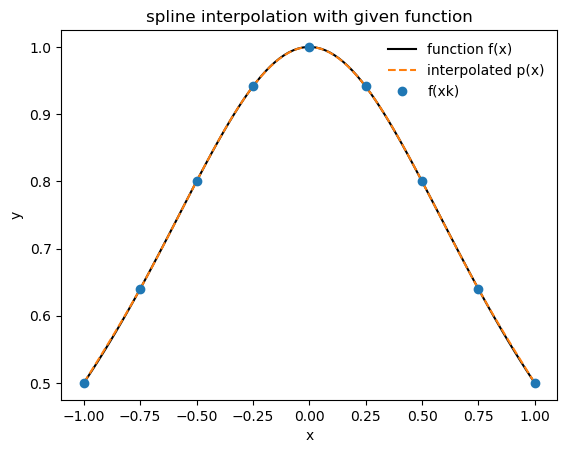

In [20]:
# Spline interpolation part c: write your own spline interpolation function

# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy as np
from numpy import cos, exp, pi, sin, sinc, sinh, sqrt

# SciPy
import scipy.linalg as linalg

mpl.rcParams['legend.frameon'] = False

def f(x):
    return 1/(1 + x**2)

x_min=-1
x_max=1
N = 9
x = np.linspace(x_min,x_max,N)
pk=f(x)

def h():
    return 0.25

p_double=np.zeros([N], dtype=float) 
A=np.zeros([N,N], dtype=float)
A[0][0]=1
A[-1][-1]=1
b=np.zeros([N], dtype=float) 
#calc A
for i in range(1,N-1):
    for j in range (1,N-1):
        if(i==j):
            A[i,j]=2*(h() + h())
        if(j==i+1):
            A[i,j]=h()
        if(j==i-1):
            A[i,j]=h()
#calc b
for i in range(1,N-1):
    b[i] = 6*(((pk[i+1]-pk[i])/h())-((pk[i]-pk[i-1])/h()))
#calc p"    
p_double=np.linalg.solve(A, b)


def p(u,k):
    ak=(p_double[k]-p_double[k-1])/(h()*6)
    bk=p_double[k-1]/2
    ck=((pk[k]-pk[k-1])/h())     -      (1/6)*h()*(p_double[k]+2*p_double[k-1])
    dk = pk[k-1]
    return ak*((u-x[k-1])**3) + bk*((u-x[k-1])**2) + ck*(u-x[k-1]) + dk

Ns=100
xs=np.linspace(x_min,x_max,Ns)
ys=np.linspace(x_min,x_max,Ns)
y=f(xs)

for s in range(0,Ns):
    k=int(s/(Ns/8))+1
    ys[s]=p(xs[s],k)


# Make plot
plt.figure(dpi=100)


# Function

plt.plot(xs,  y,  'k-', label='function f(x)')
plt.plot(xs, ys, 'C1--',label='interpolated p(x)')
plt.plot(x, f(x), 'C0o', label='f(xk)')
plt.ylabel('y')
plt.xlabel('x')
plt.title('spline interpolation with given function')

plt.legend(loc=0)

plt.show()




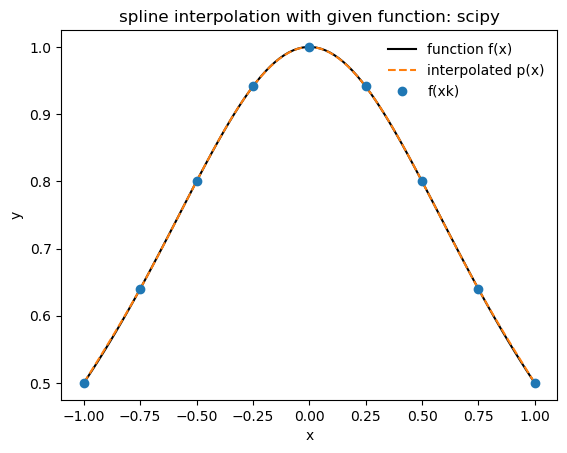

In [26]:
# Spline interpolation part d: check part (c) by using scipy's cubic interpolation function for f(x)

# Python
from datetime import datetime

# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy as np
from numpy import cos, exp, pi, sin, sqrt

# SciPy
import scipy.interpolate as interpolate

# Settings
mpl.style.use('default')
mpl.rcParams['legend.frameon']   = False

def f(x):
    return 1/(1+x**2)


# Make data for plotting
Nx = 100
x1 = -1
x2 = 1
x  = np.linspace(x1,x2,Nx)
y  = f(x)


# Spline interpolation
Ns    = 9
xs    = np.linspace(x1,x2,Ns)
ys    = f(xs)
yspl  = interpolate.CubicSpline(xs, ys, bc_type='natural')
yint  = yspl(x)



# Make plot
plt.figure(dpi=100)


# Function

plt.plot(x,  y,  'k-',label='function f(x)')
plt.plot(x, yint, 'C1--',label='interpolated p(x)')
plt.plot(xs, ys, 'C0o',label='f(xk)')
plt.ylabel('y')
plt.xlabel('x')
plt.title('spline interpolation with given function: scipy')

plt.legend(loc=0)


plt.show()

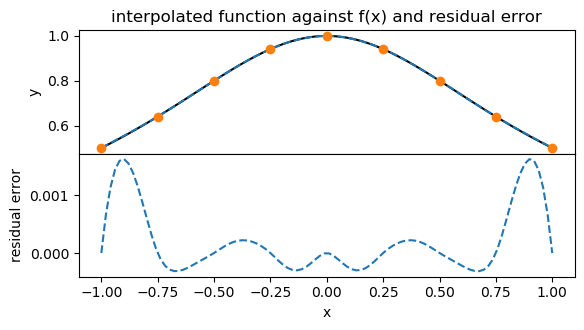

In [36]:
# Spline interpolation part e: two panel plot showing interpolated function against f(x) and residual error

# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy as np
from numpy import cos, exp, pi, sin, sinc, sinh, sqrt

# SciPy
import scipy.linalg as linalg

mpl.rcParams['legend.frameon'] = False

def f(x):
    return 1/(1 + x**2)

x_min=-1
x_max=1
N = 9
x = np.linspace(x_min,x_max,N)
pk=f(x)

def h():
    return 0.25

p_double=np.zeros([N], dtype=float) 
A=np.zeros([N,N], dtype=float)
A[0][0]=1
A[-1][-1]=1
b=np.zeros([N], dtype=float) 
#calc A
for i in range(1,N-1):
    for j in range (1,N-1):
        if(i==j):
            A[i,j]=2*(h() + h())
        if(j==i+1):
            A[i,j]=h()
        if(j==i-1):
            A[i,j]=h()
#calc b
for i in range(1,N-1):
    b[i] = 6*(((pk[i+1]-pk[i])/h())-((pk[i]-pk[i-1])/h()))
#calc p"    
p_double=np.linalg.solve(A, b)


def p(u,k):
    ak=(p_double[k]-p_double[k-1])/(h()*6)
    bk=p_double[k-1]/2
    ck=((pk[k]-pk[k-1])/h())     -      (1/6)*h()*(p_double[k]+2*p_double[k-1])
    dk = pk[k-1]
    return ak*((u-x[k-1])**3) + bk*((u-x[k-1])**2) + ck*(u-x[k-1]) + dk

Ns=100
xs=np.linspace(x_min,x_max,Ns)
ys=np.linspace(x_min,x_max,Ns)
y=f(xs)

for s in range(0,Ns):
    k=int(s/(Ns/8))+1
    ys[s]=p(xs[s],k)
    
err = ys - y

# Make plot
plt.figure(dpi=100)
plt.subplots_adjust(wspace=0, hspace=0)

# Function
plt.subplot(311)
plt.plot(xs,  y,  'k-')
plt.plot(xs, ys, 'C0--')
plt.plot(x, f(x), 'C1o')
plt.ylabel('y')
plt.title('interpolated function against f(x) and residual error')

# Residual errors
plt.subplot(312)
plt.plot(xs, err, 'C0--')
plt.ylabel('residual error')
plt.xlabel('x')



plt.show()

### 2) (6.2) Gaussian Elimination with Pivoting 

In [37]:
#program from 6.1: Gaussian elimination (without pivoting)

from numpy import array,empty

A = array([[ 4,  -1,  -1,  -1],
           [ -1,  3, 0, -1 ],
           [ -1, 0,  3,  -1 ],
           [ -1, -1,  -1,  4 ]], float)

v = array([ 5, 0, 5, 0 ],float)
N = len(v)

# Gaussian elimination
for m in range(N):
    # Divide by the diagonal element
    div = A[m,m]
    A[m,:] /= div
    v[m] /= div

    # Now subtract from the lower rows
    for i in range(m+1,N):
        mult = A[i,m]
        A[i,:] -= mult*A[m,:]
        v[i] -= mult*v[m]

# Backsubstitution
x = empty(N,float)
for m in range(N-1,-1,-1):
    x[m] = v[m]
    for i in range(m+1,N):
        x[m] -= A[m,i]*x[i]

print(x)


[3.         1.66666667 3.33333333 2.        ]


In [35]:
# Gaussian elimination with pivoting
import matplotlib        as mpl
import matplotlib.pyplot as plt

import numpy as np
from numpy import array,empty


A = array([[ 4,  -1,  -1,  -1],
           [ -1,  3, 0, -1 ],
           [ -1, 0,  3,  -1 ],
           [ -1, -1,  -1,  4 ]], float)

v = array([ 5, 0, 5, 0 ],float)
N = len(v)

def piv(c,A,b):
    a=[row[c] for row in A]
    r=[column[c] for column in A]
    a=np.absolute(a)
    pivot = np.where(a==np.amax(a))
    pivot=pivot[0][0]
    return pivot

def partial(c,A,b):
    pivot=piv(c,A,b)
    #swap the max value with the top 
    if(pivot>c):
        print("I did something")
        #sw_down=A[0,0:A.shape[1]]
        #sw_up=A[pivot,0:A.shape[1]]
        
        sw_down=np.zeros([A.shape[1]])
        sw_up=np.zeros([A.shape[1]])
        for u in range(c,A.shape[1]):
            sw_down[u]=A[c][u]
            sw_up[u]=A[pivot][u]
    
        for u in range(c,A.shape[1]):
            A[c][u]=sw_up[u]
            A[pivot][u]=sw_down[u]
        
        b_down=b[c]
        b_up=b[pivot]
            
        b[c]=b_up
        b[pivot]=b_down
    
    

# Gaussian elimination
for m in range(N):
    # Partial pivot
    partial(m,A,v)

    # Divide by the diagonal element
    div = A[m,m]
    A[m,:] /= div
    v[m] /= div

    # Now subtract from the lower rows
    for i in range(m+1,N):
        mult = A[i,m]
        A[i,:] -= mult*A[m,:]
        v[i] -= mult*v[m]

        

        
# Backsubstitution
x = empty(N,float)
for m in range(N-1,-1,-1):
    x[m] = v[m]
    for i in range(m+1,N):
        x[m] -= A[m,i]*x[i]

print(x)



## partial pivoting :
# 1) from A get get an array that contains the desired column (1D);
# 2) get the abs() of this array
# 3) determine pivot point numpy.where(arr == numpy.amax(arr)) where is index, amax gets the max value in array 
#    under the diagonal element (m)
# 4) rewrite A with this row as the row of the diagonal element
# 5) continue with gauss elim



[3.         1.66666667 3.33333333 2.        ]


In [36]:
# Gaussian elimination with pivoting for 6.17 where Gaussian elimination without pivoting fails
# compared to scipy's result
import matplotlib        as mpl
import matplotlib.pyplot as plt

import numpy as np
from numpy import array,empty


A = array([[ 0,  1,  4,  1],
           [ 3,  4, -1, -1 ],
           [ 1, -4,  1,  5 ],
           [ 2, -2,  1,  3 ]], float)

v = array([ -4, 3, 9, 7 ],float)
N = len(v)

def piv(c,A,b):
    a=[row[c] for row in A]
    r=[column[c] for column in A]
    a=np.absolute(a)
    pivot = np.where(a==np.amax(a))
    pivot=pivot[0][0]
    return pivot

def partial(c,A,b):
    pivot=piv(c,A,b)
    #swap the max value with the top 
    if(pivot>c):
        #sw_down=A[0,0:A.shape[1]]
        #sw_up=A[pivot,0:A.shape[1]]
        
        sw_down=np.zeros([A.shape[1]])
        sw_up=np.zeros([A.shape[1]])
        for u in range(c,A.shape[1]):
            sw_down[u]=A[c][u]
            sw_up[u]=A[pivot][u]
    
        for u in range(c,A.shape[1]):
            A[c][u]=sw_up[u]
            A[pivot][u]=sw_down[u]
        
        b_down=b[c]
        b_up=b[pivot]
            
        b[c]=b_up
        b[pivot]=b_down
    
    

# Gaussian elimination
for m in range(N):
    # Partial pivot
    partial(m,A,v)

    # Divide by the diagonal element
    div = A[m,m]
    A[m,:] /= div
    v[m] /= div

    # Now subtract from the lower rows
    for i in range(m+1,N):
        mult = A[i,m]
        A[i,:] -= mult*A[m,:]
        v[i] -= mult*v[m]

        

        
# Backsubstitution
x = empty(N,float)
for m in range(N-1,-1,-1):
    x[m] = v[m]
    for i in range(m+1,N):
        x[m] -= A[m,i]*x[i]
print("my solution using partial pivoting:")
print(x)
print("   ")



## partial pivoting :
# 1) from A get get an array that contains the desired column (1D);
# 2) get the abs() of this array
# 3) determine pivot point numpy.where(arr == numpy.amax(arr)) where is index, amax gets the max value in array 
#    under the diagonal element (m)
# 4) rewrite A with this row as the row of the diagonal element
# 5) continue with gauss elim

#check with scipy
p = empty(N,float)
p=np.linalg.solve(A, v)
import scipy.linalg as linalg
print("scipy.linalg's solution:")
print(p)


my solution using partial pivoting:
[ 1.61904762 -0.42857143 -1.23809524  1.38095238]
   
scipy.linalg's solution:
[ 1.61904762 -0.42857143 -1.23809524  1.38095238]


### 3) (6.9) Asymmetric Quantum Well

In [67]:
# part b, calculate matrix H

# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

from numpy import array,empty

# NumPy
import numpy as np
from numpy import cos, exp, pi, sin, sinc, sinh, sqrt

# SciPy
import scipy.linalg as linalg
from scipy import integrate

mpl.rcParams['legend.frameon'] = False

N=10
H=np.zeros([N,N], dtype=float)
h_bar = 1.0545*(10**(-34)) #J*s #718
L=5*(10**-10) #m
M=9.1094*(10**(-31)) #kg
a= 1.6022*(10**(-18)) #J


##convert to SI
## you get result in joules
##convert joules to ev
## feel awesome.



##make sure to add 1 to m and to n when calling this function from a for loop filling a matrix
def Hamiltonian(m,n):
    term1=0
    term2=0
    coeff1 =  ((h_bar**2)*(n**2)*(pi**2)) / ( 2 * M * (L**2) )     #*(n**2)*(pi**2)
    coeff2 = a/L
    if(m==n):
        term1 = L/2
        term2 = (L**2)/4
        
    if(n%2 != m%2):
        term2 = -1*(((2*L)/pi)**2) *   ((m*n)  /  (((m**2)-(n**2))**2))
        
    term1 = term1*coeff1
    term2 = term2*coeff2
    result = term1 + term2
    result = result*(2/L)
    return result
    
    
for m in range(0,N):
    for n in range(0,N):
        H[n][m]=Hamiltonian(n+1,m+1)
print(H)



[[ 1.04205344e-18 -2.88598756e-19  0.00000000e+00 -2.30879005e-20
   0.00000000e+00 -6.36095218e-21  0.00000000e+00 -2.61767579e-21
   0.00000000e+00 -1.32506316e-21]
 [-2.88598756e-19  1.76491377e-18 -3.11686657e-19  0.00000000e+00
  -2.94488527e-20  0.00000000e+00 -8.97862797e-21  0.00000000e+00
  -3.94273895e-21  0.00000000e+00]
 [ 0.00000000e+00 -3.11686657e-19  2.96968099e-18 -3.18047609e-19
   0.00000000e+00 -3.20665285e-20  0.00000000e+00 -1.03036911e-20
   0.00000000e+00 -4.70484629e-21]
 [-2.30879005e-20  0.00000000e+00 -3.18047609e-19  4.65635509e-18
  -3.20665285e-19  0.00000000e+00 -3.33915916e-20  0.00000000e+00
  -1.10657985e-20  0.00000000e+00]
 [ 0.00000000e+00 -2.94488527e-20  0.00000000e+00 -3.20665285e-19
   6.82493608e-18 -3.21990348e-19  0.00000000e+00 -3.41536990e-20
   0.00000000e+00 -1.15439503e-20]
 [-6.36095218e-21  0.00000000e+00 -3.20665285e-20  0.00000000e+00
  -3.21990348e-19  9.47542395e-18 -3.22752455e-19  0.00000000e+00
  -3.46318508e-20  0.00000000e+00

In [63]:
# (c) calculate H with N=10

# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

from numpy import array,empty

# NumPy
import numpy as np
from numpy import cos, exp, pi, sin, sinc, sinh, sqrt

# SciPy
import scipy.linalg as linalg
from scipy import integrate

mpl.rcParams['legend.frameon'] = False

N=10
H=np.zeros([N,N], dtype=float)
h_bar = 1.0545*(10**(-34)) #J*s #718
L=5*(10**-10) #m
M=9.1094*(10**(-31)) #kg
a= 1.6022*(10**(-18)) #J


##convert to SI
## you get result in joules
##convert joules to ev
## feel awesome.



##make sure to add 1 to m and to n when calling this function from a for loop filling a matrix
def Hamiltonian(m,n):
    term1=0
    term2=0
    coeff1 =  ((h_bar**2)*(n**2)*(pi**2)) / ( 2 * M * (L**2) )     #*(n**2)*(pi**2)
    coeff2 = a/L
    if(m==n):
        term1 = L/2
        term2 = (L**2)/4 #L^2/4 *a/L *L/2
        
    if(n%2 != m%2):
        term2 = -1*(((2*L)/pi)**2) *   ((m*n)  /  (((m**2)-(n**2))**2))
        
    term1 = term1*coeff1
    term2 = term2*coeff2
    result = term1*(2/L) + term2*(2/L)
    return result
    
    
for m in range(0,N):
    for n in range(0,N):
        H[n,m]=Hamiltonian(n+1,m+1)


#calculate the eigenvalues of H and print the first 10
e,w=linalg.eigh(H)
#convert e from joules to eV
e = e/(1.6022*(10**-19))
ep=np.zeros([N], dtype=complex)
for n in range(N):
    ep[n]=e[n]
print(ep)

[  5.83605893+0.j  11.1801874 +0.j  18.66084476+0.j  29.14053797+0.j
  42.64934576+0.j  59.17700213+0.j  78.71811979+0.j 101.27080035+0.j
 126.83280052+0.j 155.53240248+0.j]


In [66]:
# (d) calculate H with N=100 


# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

from numpy import array,empty

# NumPy
import numpy as np
from numpy import cos, exp, pi, sin, sinc, sinh, sqrt

# SciPy
import scipy.linalg as linalg
from scipy import integrate

mpl.rcParams['legend.frameon'] = False

N=100
H=np.zeros([N,N], dtype=float)
h_bar = 1.0545*(10**(-34)) #J*s #718
L=5*(10**-10) #m
M=9.1094*(10**(-31)) #kg
a= 1.6022*(10**(-18)) #J


##convert to SI
## you get result in joules
##convert joules to ev
## feel awesome.



##make sure to add 1 to m and to n when calling this function from a for loop filling a matrix
def Hamiltonian(m,n):
    term1=0
    term2=0
    coeff1 =  ((h_bar**2)*(n**2)*(pi**2)) / ( 2 * M * (L**2) )     #*(n**2)*(pi**2)
    coeff2 = a/L
    if(m==n):
        term1 = L/2
        term2 = (L**2)/4 #L^2/4 *a/L *L/2
        
    if(n%2 != m%2):
        term2 = -1*(((2*L)/pi)**2) *   ((m*n)  /  (((m**2)-(n**2))**2))
        
    term1 = term1*coeff1
    term2 = term2*coeff2
    result = term1*(2/L) + term2*(2/L)
    return result
    
    
for m in range(0,N):
    for n in range(0,N):
        H[n,m]=Hamiltonian(n+1,m+1)


#calculate the eigenvalues of H and print the first 10
e,w=linalg.eigh(H)
#convert e from joules to eV
e = e/(1.6022*(10**-19))
ep=np.zeros([10], dtype=complex)
for n in range(10):
    ep[n]=e[n]
print(ep)

[  5.83605853+0.j  11.18018608+0.j  18.66084288+0.j  29.14052917+0.j
  42.64933664+0.j  59.17694953+0.j  78.71806796+0.j 101.27016932+0.j
 126.83196799+0.j 155.40276033+0.j]


It seems from looking at the N=10 verse N=100 results that the first energy levels of N=10 are more accurate but as energy levels increase the smaller set size causes the results to be less accurate.